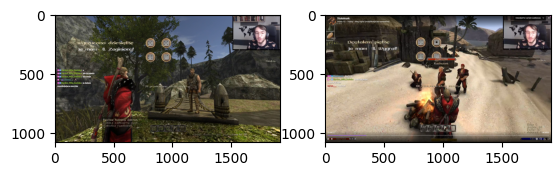

In [34]:
# Load reference images
import cv2
from matplotlib import pyplot as plt

ref_loss = cv2.imread('data/ref_loss.png')
ref_win = cv2.imread('data/ref_win.png')

# Show images with matplotlib
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ref_loss, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ref_win, cv2.COLOR_BGR2RGB))
plt.show()

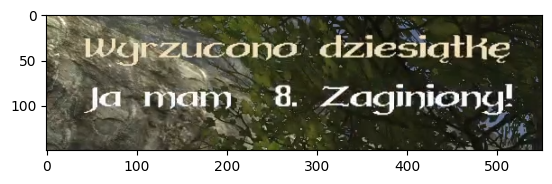

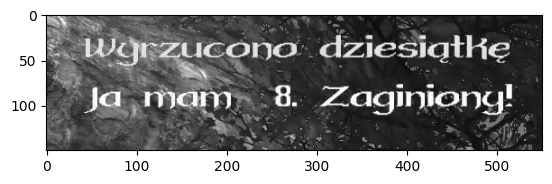

In [35]:
# Select the middle of the image
ref_loss = ref_loss[200:350, 150:700]
ref_win = ref_win[200:350, 150:700]

plt.imshow(cv2.cvtColor(ref_loss, cv2.COLOR_BGR2RGB))
plt.show()

gray_loss = cv2.cvtColor(ref_loss, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_loss, cmap='gray')
plt.show()

In [36]:
# Prepare the image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

_, thresholded_image_loss = cv2.threshold(gray_loss, 164, 255, cv2.THRESH_BINARY)

In [37]:
loss_text = pytesseract.image_to_string(thresholded_image_loss, lang="pol")
print(loss_text)

RZ
z Wąrzyucono dziesiątkę
7 NI

Jja,mam 8. Zaginiony!


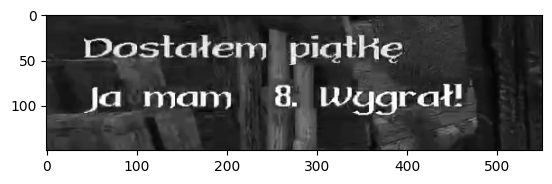

Dostałem piątkę
Ja mam 8. Wygrał!


In [38]:
# Do the same for the winning image
gray_win = cv2.cvtColor(ref_win, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_win, cmap='gray')
plt.show()

_, thresholded_image_win = cv2.threshold(gray_win, 164, 255, cv2.THRESH_BINARY)

win_text = pytesseract.image_to_string(thresholded_image_win, lang="pol")
print(win_text)